In [1]:
#!/usr/bin/python
import numpy as np
import scipy.stats as st
import matplotlib as mpl
import matplotlib.pyplot as plt
import os, math, sys
np.random.seed(88)
os.system('rm *.pdf *.eps *.png');

In [2]:
def likfunc(X1):
    return st.multivariate_normal.pdf(X1,-5,1) + st.multivariate_normal.pdf(X1,5,1)
def priorPdf(X1,alpha):
    return st.multivariate_normal.pdf(X1,0,1/alpha)

In [7]:
Ngrd = 100
X1bnd = [-15,15]
X1grd = np.linspace(X1bnd[0],X1bnd[1],Ngrd)

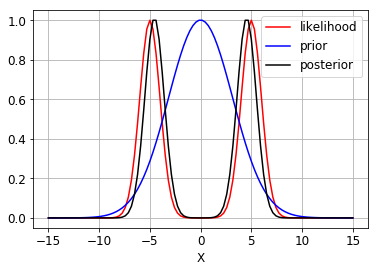

In [8]:
lik = [0]*Ngrd
postr = [0]*Ngrd
prior = [0]*Ngrd
for i in range(0,Ngrd):
    alphai = np.power(10.0,-1)
    lik[i] = likfunc(X1grd[i])
    prior[i] = priorPdf(X1grd[i],alphai)
    postr[i] = likfunc(X1grd[i])*priorPdf(X1grd[i],alphai)
mpl.rcParams.update({'font.size':12})
fig = plt.figure(1)
plt.plot(X1grd,lik/max(lik),'r-',label='likelihood')
plt.plot(X1grd,prior/max(prior),'b-',label='prior')
plt.plot(X1grd,postr/max(postr),'k-',label='posterior')
plt.grid(True)
#plt.ylabel('Y')
plt.xlabel('X')
plt.legend(loc='best', numpoints = 1)

Text(0.5,0,'alpha')

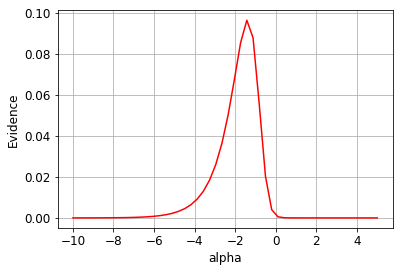

In [9]:
Niter = 50
Alpgrd = np.linspace(-10,5,Niter)
evid = [0]*Niter
for j in range(0,Niter):
    alphai = np.power(10.0,Alpgrd[j])
    for i in range(0,Ngrd):
        postr[i] = likfunc(X1grd[i])*priorPdf(X1grd[i],alphai)
    evid[j] = np.trapz(postr,X1grd)
fig = plt.figure(2)
plt.plot(Alpgrd,evid,'r-')
plt.grid(True)
plt.ylabel('Evidence')
plt.xlabel('alpha')
#plt.legend(loc='best', numpoints = 1)